# Regresion Logistica

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [5]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('C:\\datos\\fase 2\\regresion logistica para predecir enfermedades\\framingham.csv')

In [6]:
# Verificar información básica de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [19]:
# Imputar valores faltantes en la columna 'glucose' utilizando la mediana
imputer = SimpleImputer(strategy='median')
data['glucose'] = imputer.fit_transform(data['glucose'].values.reshape(-1, 1))

# Eliminar filas con valores faltantes en otras columnas
data.dropna(inplace=True)

In [20]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']


In [21]:

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Inicializar y entrenar el modelo de regresión logística
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train)

C:\Users\USUARIP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [23]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [24]:
# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       662
           1       0.83      0.04      0.07       136

    accuracy                           0.83       798
   macro avg       0.83      0.52      0.49       798
weighted avg       0.83      0.83      0.77       798



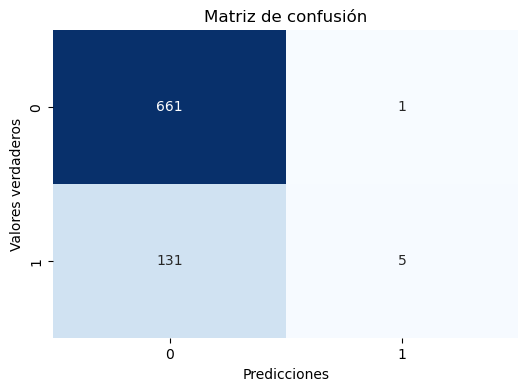

In [25]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusión')
plt.show()

In [26]:
# Curva ROC y AUC
y_probs = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

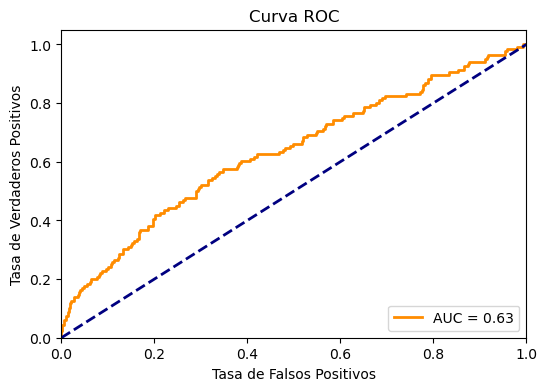

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

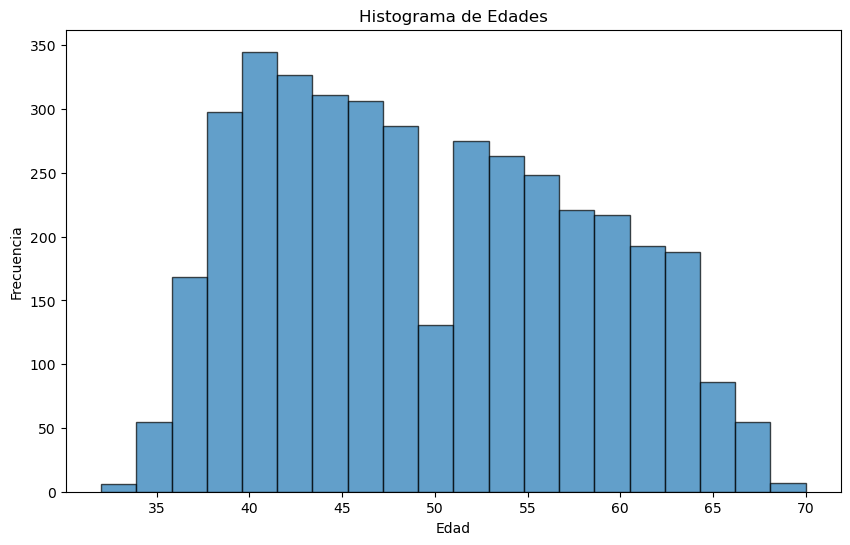

In [28]:
# Seleccionar la columna 'age' para el histograma
age_data = data['age']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)

# Personalizar el gráfico
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [29]:
# Eliminar filas con valores NA si es necesario
data = data.dropna()

# Verificar los primeros registros para asegurarte de que los datos se cargaron correctamente
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [30]:
# Seleccionar características y variable objetivo
X = data[["male", "age"]]
y = data["diabetes"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo sobre diabetes en funcion de edad y genero es de:", accuracy)

Precisión del modelo sobre diabetes en funcion de edad y genero es de: 0.9736842105263158


### Gráfica de dispersión de datos de prueba

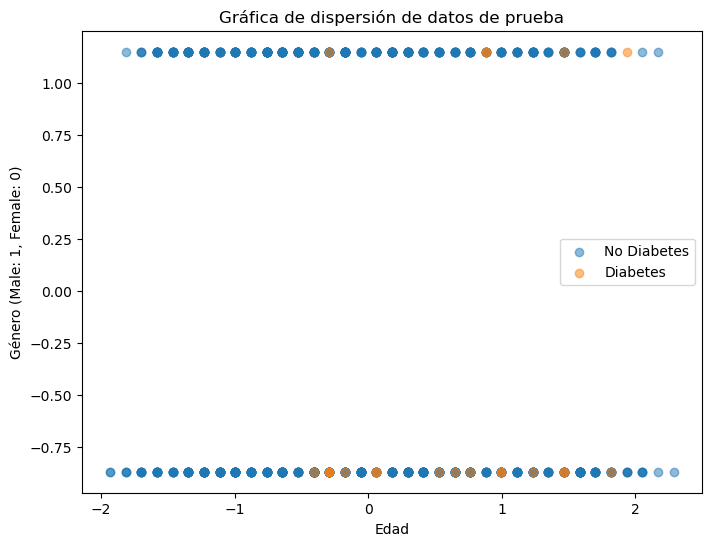

In [52]:
# Crea una gráfica de dispersión de los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 0], label="No Diabetes", alpha=0.5)
plt.scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 0], label="Diabetes", alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Género (Male: 1, Female: 0)")
plt.legend()
plt.title("Gráfica de dispersión de datos de prueba")
plt.show()

#### Matriz de Confusión para la columna diabetes

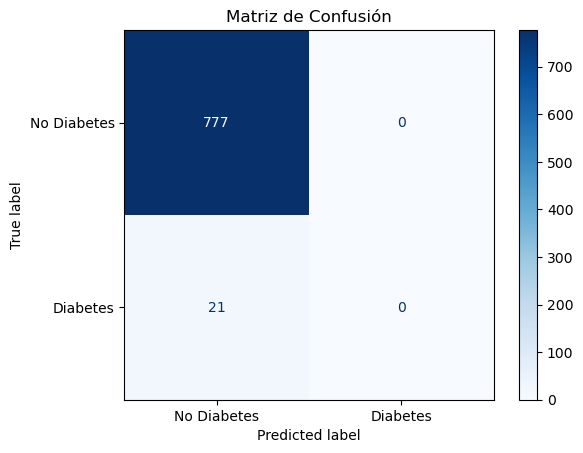

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

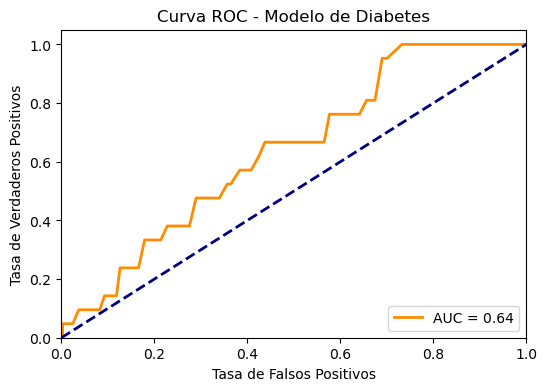

In [56]:
# Calcula la probabilidad de pertenecer a la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crea la figura y el gráfico
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Modelo de Diabetes')
plt.legend(loc='lower right')
plt.show()

#### Gráfico de Probabilidades : Puedes crear un gráfico de las probabilidades predichas por el modelo

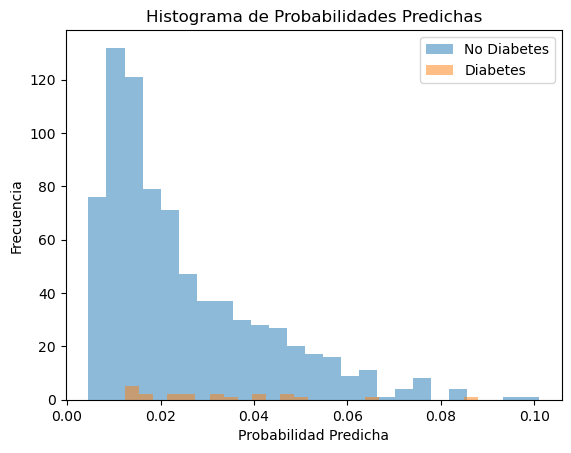

In [55]:
# Calcula las probabilidades predichas por el modelo
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Crea un histograma de probabilidades para cada clase
plt.hist(predicted_probabilities[y_test == 0], bins=25, alpha=0.5, label="No Diabetes")
plt.hist(predicted_probabilities[y_test == 1], bins=25, alpha=0.5, label="Diabetes")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Histograma de Probabilidades Predichas")
plt.show()